### 파이썬 고급문법

---

- 제너레이터
- Magic 메소드
- 이너레이터
- 데코레이터 (랩핑)

## 데코레이터

---

-데코레이터는 장식하다 꾸미다  
-장식하는 도구 정도로 설명가능  
-클래스에서 메서드를 만들때 @staticmethod  


In [1]:
def trace(func):                             # 호출할 함수를 매개변수로 받음
    def wrapper():                           # 호출할 함수를 감싸는 함수
        print(func.__name__, '함수 시작')    # __name__으로 함수 이름 출력
        func()                               # 매개변수로 받은 함수를 호출
        print(func.__name__, '함수 끝')
    return wrapper                           # wrapper 함수 반환
 
def hello():
    print('hello')
 
def world():
    print('world')
 
trace_hello = trace(hello)    # 데코레이터에 호출할 함수를 넣음
trace_hello()                 # 반환된 함수를 호출
trace_world = trace(world)    # 데코레이터에 호출할 함수를 넣음
trace_world()                 # 반환된 함수를 호출

hello 함수 시작
hello
hello 함수 끝
world 함수 시작
world
world 함수 끝


In [3]:
def trace(func):                             # 호출할 함수를 매개변수로 받음
    def wrapper():
        print(func.__name__, '함수 시작')    # __name__으로 함수 이름 출력
        func()                               # 매개변수로 받은 함수를 호출
        print(func.__name__, '함수 끝')
    return wrapper                           # wrapper 함수 반환
 
@trace    # @데코레이터
def hello():
    print('hello')
 
@trace    # @데코레이터
def world():
    print('world')
 
hello()    # 함수를 그대로 호출
world()    # 함수를 그대로 호출

hello 함수 시작
hello
hello 함수 끝
world 함수 시작
world
world 함수 끝


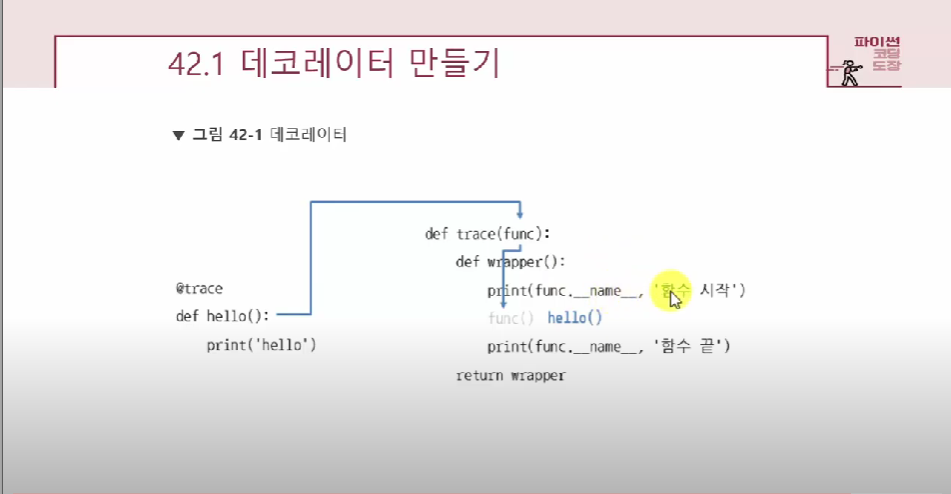

-hello를 호출시 trace에 인자로 hello를주면서 trace가실행된다

### 매개변수와 반환값을 처리하는 데코레이터 만들기

In [5]:
def trace(func):          # 호출할 함수를 매개변수로 받음
    def wrapper(a, b):    # 호출할 함수 add(a, b)의 매개변수와 똑같이 지정
        r = func(a, b)    # func에 매개변수 a, b를 넣어서 호출하고 반환값을 변수에 저장
        print('{0}(a={1}, b={2}) -> {3}'.format(func.__name__, a, b, r))  # 매개변수와 반환값 출력
        return r          # func의 반환값을 반환
    return wrapper        # wrapper 함수 반환
 
@trace              # @데코레이터
def add(a, b):      # 매개변수는 두 개
    return a + b    # 매개변수 두 개를 더해서 반환
 
print(add(10, 20))

add(a=10, b=20) -> 30
30


1.add(a,b)와 똑같이 매개변수를 wrapper를만들어주면된다  
1.wrapper함수안에서 func(add)를 호출하고 반환값r저장  
1.해당되는 매개변수와 반환값 r출력  
1.func에는 a,b를 그대로넣어준다  


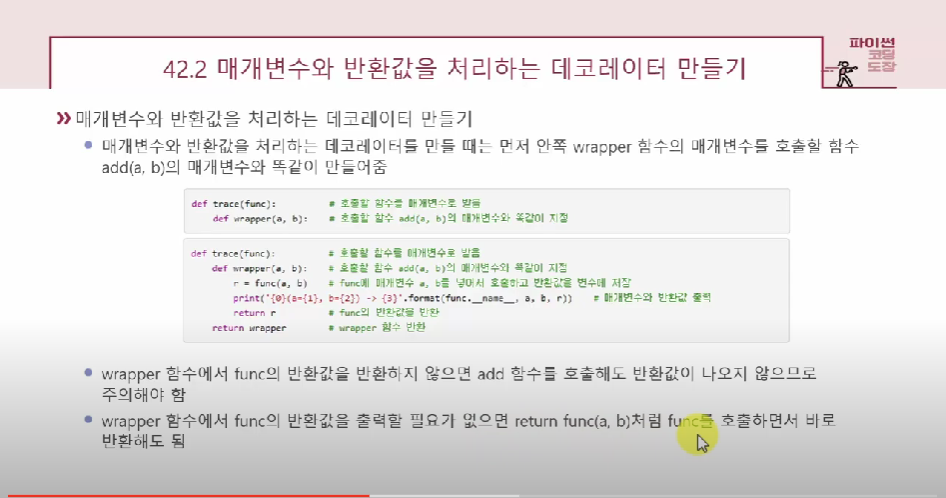

## 가변 인수 함수 데코레이터
---

+ 인수가 몇개들어올지 미정  
+ *args 여러개의 복수의 인자를 함수로 받고자할때 사용  
+ *args 는 튜플형태로 함수의 매개변수에 전달이 된다  
---
+ **kwargs Keyword argument 
+ **kewargs는 (키워드==특정 값) 형태로 함수를 호출가능
+ 이것을 딕셔너리 형태로{'키워드':'특정 값'} 함수내부로 매개변수로 전달  

In [10]:
def trace(func):                     # 호출할 함수를 매개변수로 받음
    def wrapper(*args, **kwargs):# 가변 인수 함수로 만듦
        print("args={} kwargs={}\n".format(args,kwargs))
        r = func(*args, **kwargs)    # func에 args, kwargs를 언패킹하여 넣어줌
        print('{0}(args={1}, kwargs={2}) -> {3}'.format(func.__name__, args, kwargs, r))
                                     # 매개변수와 반환값 출력
        return r                     # func의 반환값을 반환
    return wrapper                   # wrapper 함수 반환
 
@trace                   # @데코레이터
def get_max(*args):# 위치 인수를 사용하는 가변 인수 함수
    return max(args)
 
@trace                   # @데코레이터
def get_min(**kwargs):   # 키워드 인수를 사용하는 가변 인수 함수
    return min(kwargs.values())
 
print(get_max(10, 20))
print(get_min(x=10, y=20, z=30))

args=(10, 20) kwargs={}

get_max(args=(10, 20), kwargs={}) -> 20
20
args=() kwargs={'x': 10, 'y': 20, 'z': 30}

get_min(args=(), kwargs={'x': 10, 'y': 20, 'z': 30}) -> 10
10


In [14]:
def trace(func):                     # 호출할 함수를 매개변수로 받음
    def wrapper(*args, **kwargs):# 가변 인수 함수로 만듦
        print("args={} kwargs={}\n".format(args,kwargs))
        r = func(*args, **kwargs)    # func에 args, kwargs를 언패킹하여 넣어줌
        print('{0}(args={1}, kwargs={2}) -> {3}'.format(func.__name__, args, kwargs, r))
                                     # 매개s변수와 반환값 출력
        return r                     # func의 반환값을 반환
    return wrapper     

@trace
def add(a,b):
    return a+b
add(10,20)


args=(10, 20) kwargs={}

add(args=(10, 20), kwargs={}) -> 30


30